# Batch normalization

In [1]:
print("Hello!")
"Parth"

Hello!


'Parth'

[]

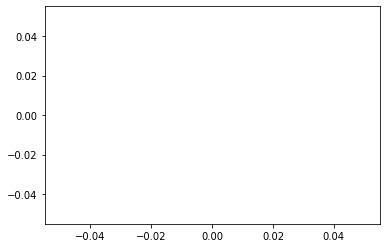

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.plot()

In [3]:
import plotly.graph_objs as go
import numpy as np
from ipywidgets import interact

fig = go.FigureWidget()

red = 'rgba(237, 31, 31, 1)'
green = 'rgba(12, 237, 49, 1)'
yellow = 'rgba(237, 223, 31, 1)'
blue = 'rgba(31, 199, 237, 1)'

fig.add_trace(go.Scatter(
    marker_color=red,
    name='line'
))

# add_scatter(marker_color=red)
scatt = fig.data[0]
fig.update_layout(
    width = 800,
    height = 500,
#     title = "fixed-ratio axes"
)
# fig.update_yaxes(
#     scaleanchor = "x",
#     scaleratio = 1,
#   )


N = 100

# cx1 = 16*np.random.rand() - 8
# cx2 = 16*np.random.rand() - 8
# cy1 = 10*np.random.rand() - 5
# cy2 = 10*np.random.rand() - 5

cx1 = 4
cx2 = -1
cy1 = 2
cy2 = -3

x1 = cx1 + np.random.randn(N)
x2 = cx2 + np.random.randn(N)
y1 = cy1 + np.random.randn(N)
y2 = cy2 + np.random.randn(N)

fig.add_trace(go.Scatter(x=x1, y=y1,
                    mode='markers',
                    name='markers',
                    marker_color=yellow))
fig.add_trace(go.Scatter(x=x2, y=y2,
                    mode='markers',
                    name='markers',
                    marker_color=blue))

xs=np.linspace(-10, 10, 100)
fig.update_xaxes(range=[-8, 8])
fig.update_yaxes(range=[-5, 5])

classified = False

def evaluate(slope, intercept, x, y):
    """
    slope, intercept: description of the classifier
    x, y: arrays of length N representing N points
    returns: 1 if all points are classified as positive by the line
             0 if points are mixed
            -1 if all points are classified as negative
    """
    res = slope*x - y + intercept
    if (res > 0).all():
        return 1
    elif (res < 0).all():
        return -1
    return 0

@interact(slope=(-5, 5, 0.0001), intercept=(-6, 6, 0.01))
def update(slope=1, intercept=0):
    with fig.batch_update():
        scatt.x = xs
        scatt.y = slope * xs + intercept
    ev1 = evaluate(slope, intercept, x1, y1)
    ev2 = evaluate(slope, intercept, x2, y2)
    classified = ev1 != 0 and ev2 != 0 and ev1 == -1*ev2
    if classified:
        fig.update_traces(marker_color=green,
                  selector=dict(name="line"))
    else:
        fig.update_traces(marker_color=red,
                  selector=dict(name="line"))
        
fig

interactive(children=(FloatSlider(value=1.0, description='slope', max=5.0, min=-5.0, step=0.0001), FloatSlider…

FigureWidget({
    'data': [{'marker': {'color': 'rgba(237, 31, 31, 1)'},
              'name': 'line',
      …